<a href="https://colab.research.google.com/github/Tclack88/MountainProject/blob/master/rp_os_pyramids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redpoint/Onsight ladders

In [0]:
import pandas as pd
import numpy as np
from math import floor
from datetime import datetime as dt
import seaborn as sb
import matplotlib.pyplot as plt
sb.set(style='whitegrid')

In [0]:
# Get Grade for conversion (from Mountain Project's official grade converter)
grade_chart = pd.read_html("https://www.mountainproject.com/international-climbing-grades")
old_ropes = grade_chart[0].YDSUSA[:-1].to_list()
new_ropes = [0,0,0,0,1,2,3,4,5,6,7,7.4,8,8.4,8.8,9,9.4,9.8]+list(np.round(np.arange(10,16,.1),1))
ropes_convert = dict(zip(old_ropes,new_ropes))

In [0]:
# Supporting functions for clean and prep pipeline
def clean_grade(grade):
  grade = str(grade).split()[0]
  if grade[0] == '5':
    grade = ropes_convert[grade]
    return grade

def x_round(x):
  """ rounds down to nearest .25
  eg. x_round(11.49) = 11.25, x_round(11.51) = 11.5
  """
  if x >= 10:
    return floor(x*4)/4
  else: return x

# trad_os.grade.apply(x_round).value_counts().sort_index(ascending=False)


# Rounding Key example:

# 10a, 10-, 10a/b  -> 10a
# 10b, 10          -> 10b
# 10b/c, 10c, 10+  -> 10c
# 10c/d, 10d       -> 10d

# def grade_to_number(grade):
#   letter_map = {'a':'.0', 'b':'.25', 'c':'.5', 'd':'.75', '-':'.0', '+':'.8'}
#   if grade[-1].isnumeric() == False:
#     grade = grade[:-1] + letter_map[grade[-1]]
#     print(grade)
#   else:
#     grade += '.4'
#     print(grade)


def grade_to_letter(grade):
  letter_map = {'.0':'a', '.25':'b', '.5':'c', '.75':'d'}
  letter_map_low = {'.0':'-', '.4':'', '.8':'+'}
  if grade >= 10:
    grade = str(grade)
    grade = grade[:2] + letter_map[grade[2:]]
    return grade
  else:
    grade = str(grade)
    grade = grade[:1] + letter_map_low[grade[1:]]
    return grade


In [44]:
successful_climbs = data[(data.lead_style == 'Redpoint') | (data.lead_style =='Onsight')]
grades = successful_climbs.grade.to_list()
routes = successful_climbs.route.to_list()

grade_route_tuples = list(zip(grades,routes))
grade_route_tuples

[(11.3, "This Nazi Shit Won't Do"),
 (10.0, 'Easy Prey'),
 (10.0, 'Little Red Book'),
 (9.4, 'Rites of Spring'),
 (8.4, 'Walk on the Wild Side'),
 (6.0, 'Right On'),
 (9.4, 'Flower of High Rank'),
 (7.0, 'Yours'),
 (8.4, 'The Long Climb'),
 (7.0, "A Midsummer's Night Seam"),
 (5.0, 'Firewater'),
 (10.3, 'Tombstone Shadow'),
 (10.3, 'Dead Man Chalking'),
 (8.4, 'Gold Bug'),
 (7.0, 'Hidden Gold'),
 (6.0, "Dave's Crack"),
 (10.0, 'Wilburs Turning in His Grave'),
 (10.3, 'Nitroglycerine'),
 (8.4, 'Boom Sauce'),
 (9.4, 'Whiptail'),
 (10.3, "Shootin' Blanks"),
 (10.0, 'Ricochet'),
 (10.0, 'Powder Keg'),
 (11.0, 'Pistol Whipped'),
 (10.0, 'One Armed Bandit'),
 (10.0, 'Claim Jumper'),
 (10.3, 'She Gave Him Blue Bolts'),
 (10.0, 'The Bread Loaf'),
 (8.8, 'Mukat and the Fiery Arrowhead in the Sky'),
 (7.0, 'Northeast Face West'),
 (7.0, 'El Whampo'),
 (9.0, 'Mouse Maze'),
 (10.0, 'Hanging Gardens Route'),
 (10.0, 'Sheer Stress'),
 (10.4, 'Red Eye'),
 (9.4, 'Classic Crack'),
 (9.4, "Helm's Deep")

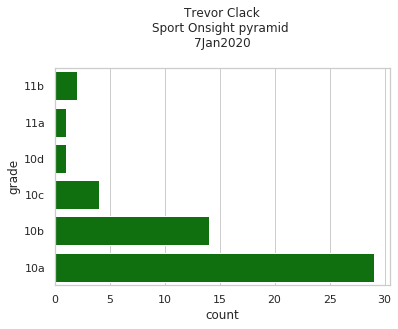

  grade  count
0   11b      2
1   11a      1
2   10d      1
3   10c      4
4   10b     14
5   10a     29


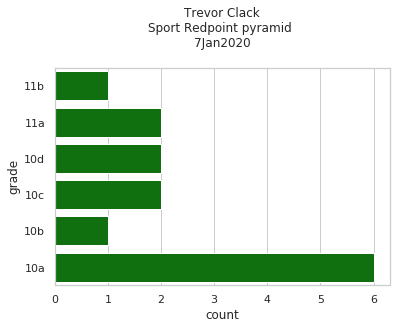

  grade  count
0   11b      1
1   11a      2
2   10d      2
3   10c      2
4   10b      1
5   10a      6


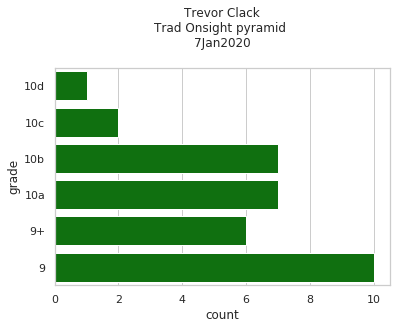

  grade  count
0   10d      1
1   10c      2
2   10b      7
3   10a      7
4    9+      6
5     9     10


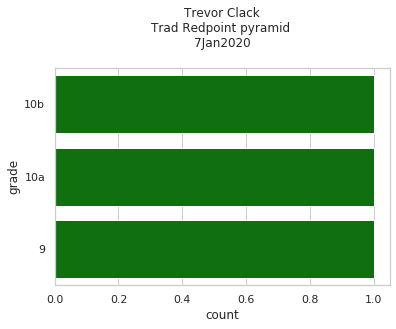

  grade  count
0   10b      1
1   10a      1
2     9      1


In [34]:
document = "https://www.mountainproject.com/user/109791883/trevor-clack/tick-export"
# document = "https://www.mountainproject.com/user/110296901/morgan-f/tick-export"

climber = document.split('/')[-2].replace('-',' ').title()
date = dt.now().strftime('%-d%b%Y')
data = pd.read_csv(document)
data = data[['Route', 'Rating', 'Style', 'Lead Style', 'Route Type']]
data = data.rename(columns = (dict(zip(data.columns,['route', 'grade', 'style', 'lead_style', 'type']))))
data.grade = data.grade.apply(clean_grade)
data = data[data['style'] == 'Lead']
# Split Trad and Sport data
trad = data[(data['type'] == 'Trad') | (data['type'] == 'Trad, Sport') | (data['type'] == 'Trad, Alpine') | (data['type'] == 'Trad, Aid')]
sport = data[(data['type'] == 'Sport') | (data['type'] == 'Sport, TR')]
trad_rp = trad[trad.lead_style == 'Redpoint']
trad_os = trad[trad.lead_style == 'Onsight']
trad_os.grade.apply(x_round).value_counts().sort_index(ascending=False)
sport_rp = sport[sport.lead_style == 'Redpoint']
sport_os = sport[sport.lead_style == 'Onsight']


styles = [sport_os, sport_rp, trad_os, trad_rp]

for style in styles:
  if not style.empty:
    title = f"{climber}\n{style.iloc[0]['type'].split(',')[0]} {style.iloc[0].lead_style} pyramid \n{date}\n"
    top_pyramid = style.grade.apply(x_round).value_counts().sort_index(ascending=False).iloc[:6].reset_index()
    top_pyramid.columns = ('grade','count')
    top_pyramid.grade = top_pyramid.grade.apply(grade_to_letter)
    sb.barplot(y='grade', x='count', data=top_pyramid, color='green')
    plt.title(title)
    plt.show()
    print(top_pyramid)

## Combined redpoint and os pyramid

In [0]:
def make_pyramid(document):
  climber = document.split('/')[-2].replace('-',' ').title()
  date = dt.now().strftime('%-d%b%Y')
  data = pd.read_csv(document)
  data = data[['Route', 'Rating', 'Style', 'Lead Style', 'Route Type']]
  data = data.rename(columns = (dict(zip(data.columns,['route', 'grade', 'style', 'lead_style', 'type']))))
  data.grade = data.grade.apply(clean_grade)
  data = data[data['style'] == 'Lead']
  # Split Trad and Sport data
  trad = data[(data['type'] == 'Trad') | (data['type'] == 'Trad, Sport') | (data['type'] == 'Trad, Alpine') | (data['type'] == 'Trad, Aid')]
  sport = data[(data['type'] == 'Sport') | (data['type'] == 'Sport, TR')]
  trad_rp = trad[trad.lead_style == 'Redpoint']
  trad_os = trad[trad.lead_style == 'Onsight']
  trad_os.grade.apply(x_round).value_counts().sort_index(ascending=False)
  sport_rp = sport[sport.lead_style == 'Redpoint']
  sport_os = sport[sport.lead_style == 'Onsight']

  sport_combined = pd.concat([sport_rp,sport_os], axis=0)
  trad_combined = pd.concat([trad_rp, trad_os], axis=0)
  styles = [sport_combined, trad_combined]

  pyramids = []
  for style in styles:
    if not style.empty:
      title = f"{climber}\n{style.iloc[0]['type'].split(',')[0]} pyramid \n as of {date}\n"
      top_pyramid = style.grade.apply(x_round).value_counts().sort_index(ascending=False).iloc[:6].reset_index()
      top_pyramid.columns = ('grade','count')
      top_pyramid.grade = top_pyramid.grade.apply(grade_to_letter)
      sb.barplot(y='grade', x='count', data=top_pyramid, color='green')
      plt.title(title)
      plt.show()
      print(top_pyramid)
      print('\n\n\t\ttop 10')
      print(style.sort_values('grade',ascending=False).head(10))
      pyramids.append(top_pyramid)

  return pyramids

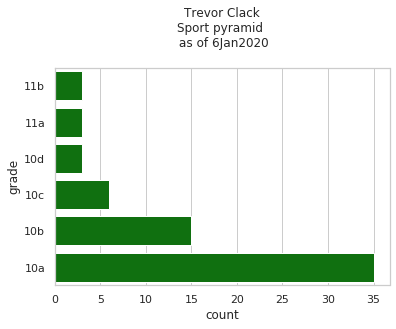

  grade  count
0   11b      3
1   11a      3
2   10d      3
3   10c      6
4   10b     15
5   10a     35


		top 10
                       route  grade style lead_style   type
1    This Nazi Shit Won't Do   11.3  Lead   Redpoint  Sport
168                 Sun Dogs   11.3  Lead    Onsight  Sport
167            Space Cowboys   11.3  Lead    Onsight  Sport
30            Pistol Whipped   11.0  Lead   Redpoint  Sport
154              Jack Jumped   11.0  Lead   Redpoint  Sport
169         Starship Trooper   11.0  Lead    Onsight  Sport
458    Better Luck Next Time   10.9  Lead    Onsight  Sport
111          Tangerine Dream   10.9  Lead   Redpoint  Sport
424             Mojave Green   10.8  Lead   Redpoint  Sport
421                  X Files   10.6  Lead   Redpoint  Sport


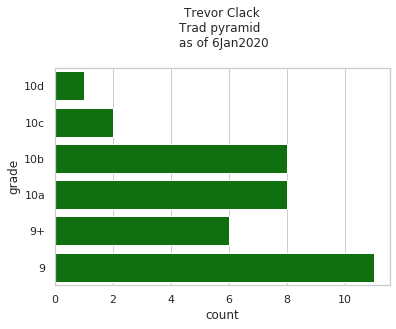

  grade  count
0   10d      1
1   10c      2
2   10b      8
3   10a      8
4    9+      6
5     9     11


		top 10
                                  route  grade style lead_style       type
128                           Two Timer   10.9  Lead    Onsight       Trad
121                 Heart of the Desert   10.6  Lead    Onsight       Trad
143                     Amaretto Corner   10.5  Lead    Onsight       Trad
149                            Jojobean   10.4  Lead    Onsight       Trad
126  Unnamed II (fingers through fists)   10.4  Lead    Onsight       Trad
114                      Stolen Chimney   10.4  Lead    Onsight  Trad, Aid
145            Supercrack of the Desert   10.4  Lead    Onsight       Trad
147                           Manifesto   10.4  Lead    Onsight       Trad
135                           Bar fight   10.4  Lead    Onsight       Trad
142                           3AM Crack   10.4  Lead    Onsight       Trad


In [7]:
document = "https://www.mountainproject.com/user/109791883/trevor-clack/tick-export"   # Trevor
# document = "https://www.mountainproject.com/user/110296901/morgan-f/tick-export"  # Morgan

sport_pyramid, trad_pyramid = make_pyramid(document)

In [7]:
trad_combined[trad_combined.grade >= 10]

NameError: ignored

## Make suggestions to "fill out" pyramid

In [8]:
# pros are usually 1, 3, 20, 50, 100 (based on 8a.nu)
# intermediate maybe 1, 3, 10, 20, 30
# 1 2 4 8 12 seems reasonable for a beginner


sport_pyramid

,grade,count
0,11b,3
1,11a,3
2,10d,3
3,10c,6
4,10b,15
5,10a,35


In [0]:
grades_list = '0 1 2 3 4 5 6 7 7+ 8- 8 8+ 9- 9 9+'.split()

nums = '10 11 12 13 14 15'.split()
lets =  list('abcd')
for i in nums:
  for j in lets:
    grades_list.append(i+j)

def suggest_pyramid(pyramid):
  scheme = [2,4,8,12]
  pyramid_copy = pyramid.copy().iloc[0:4]
  pyramid_copy['ideal_count'] = scheme
  print(pyramid_copy)
  cols = pyramid_copy.columns
  top_layer = [grades_list[grades_list.index(pyramid.grade[0]) + 1], 0, 1] # [x, 0, 0] where x is the next higher grade (eg. if 11a is max grade then x is 11b)
  top_layer = dict(zip(cols,top_layer))
  top_layer = pd.DataFrame(top_layer, index=[0])
  pyramid_copy = pd.concat([top_layer, pyramid_copy]).reset_index(drop = True)
  pyramid_copy['todo'] = pyramid_copy.ideal_count - pyramid_copy['count']
  print(pyramid_copy)
  pyramid_copy.todo = pyramid_copy.todo.apply(lambda x: 0 if (x < 1) else x)
  print(pyramid_copy)

In [58]:
suggest_pyramid(sport_pyramid)

  grade  count  ideal_count
0   11b      3            2
1   11a      3            4
2   10d      3            8
3   10c      6           12
  grade  count  ideal_count  todo
0   11c      0            1     1
1   11b      3            2    -1
2   11a      3            4     1
3   10d      3            8     5
4   10c      6           12     6
  grade  count  ideal_count  todo
0   11c      0            1     1
1   11b      3            2     0
2   11a      3            4     1
3   10d      3            8     5
4   10c      6           12     6


In [0]:
## Scraping to make reccomendations
from bs4 import BeautifulSoup
import requests

url  = "https://www.mountainproject.com/area/classics/105865045/new-jack-city"

In [47]:
table

,Route Name,Location,Star Rating,Difficulty,Date
0,● Slash X,Box Canyon East > Slash X boulder,7,V6- 7A Boulder,NaN
1,● Love Potion #9,Entrance Area C… > Valentine Wall,31,5.7 5a 15 V+ 13 MVS 4b Sport,NaN
2,● Custom Tailored,Box Canyon East > Raven Rocks > Raven Rocks ...,106,5.7 5a 15 V+ 13 MVS 4b Sport,NaN
3,● Ivy Alice,Box Canyon East > Boy Scout Wall,59,5.7 5a 15 V+ 13 MVS 4b Sport,NaN
4,● Indirect Action,Box Canyon East > Indirect Crag,35,5.7 5a 15 V+ 13 MVS 4b Sport,NaN
...,...,...,...,...,...
95,● Lethal Weapon,Box Canyon East > Lethal Rock,7,5.12c 7b+ 27 IX- 27 E6 6b Sport,NaN
96,● Hallraker,Box Canyon West > Predator Wall > Predator W...,4,5.12d 7c 28 IX 28 E6 6b Sport,NaN
97,● The DX,Box Canyon West > Scott Cosgrove Memori…,9,5.12d 7c 28 IX 28 E6 6b Sport,NaN
98,● Ride The Wild,Box Canyon West > Arch Rocks,7,5.12d 7c 28 IX 28 E6 6b Sport,NaN


In [49]:
import pandas as pd
table = pd.read_html(url)[1]
table
grades = table.Difficulty.apply(lambda x: x.split()[0])   # HAVE TO CONVERT TO LETTER GRADE ? :[
grades
routes = table['Route Name'].apply(lambda x: ' '.join(x.split()[1:]))
routes


0             Slash X
1      Love Potion #9
2     Custom Tailored
3           Ivy Alice
4     Indirect Action
           ...       
95      Lethal Weapon
96          Hallraker
97             The DX
98      Ride The Wild
99       The Travesty
Name: Route Name, Length: 100, dtype: object

In [29]:
table[1]

,Route Name,Location,Star Rating,Difficulty,Date
0,● Slash X,Box Canyon East > Slash X boulder,7,V6- 7A Boulder,NaN
1,● Love Potion #9,Entrance Area C… > Valentine Wall,31,5.7 5a 15 V+ 13 MVS 4b Sport,NaN
2,● Custom Tailored,Box Canyon East > Raven Rocks > Raven Rocks ...,106,5.7 5a 15 V+ 13 MVS 4b Sport,NaN
3,● Ivy Alice,Box Canyon East > Boy Scout Wall,59,5.7 5a 15 V+ 13 MVS 4b Sport,NaN
4,● Indirect Action,Box Canyon East > Indirect Crag,35,5.7 5a 15 V+ 13 MVS 4b Sport,NaN
...,...,...,...,...,...
95,● Lethal Weapon,Box Canyon East > Lethal Rock,7,5.12c 7b+ 27 IX- 27 E6 6b Sport,NaN
96,● Hallraker,Box Canyon West > Predator Wall > Predator W...,4,5.12d 7c 28 IX 28 E6 6b Sport,NaN
97,● The DX,Box Canyon West > Scott Cosgrove Memori…,9,5.12d 7c 28 IX 28 E6 6b Sport,NaN
98,● Ride The Wild,Box Canyon West > Arch Rocks,7,5.12d 7c 28 IX 28 E6 6b Sport,NaN


In [20]:
table.apply(lambda x: '●'.split(str(x)))

0    [●]
dtype: object

In [22]:
str(table.iloc[0]).split()

['0',
 'V6-',
 '7A',
 '7',
 '●',
 'Slash',
 'X',
 'Boulder',
 'Box',
 'Canyon',
 'East',
 '...',
 'Name:',
 '0,',
 'dtype:',
 'object']